# DS-SF-30 | Class 17: Predicting House Price


In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

from pandas.tools.plotting import scatter_matrix
from sklearn import tree, ensemble, metrics, cross_validation, externals
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection, linear_model

%load_ext gvmagic


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/Users/vdodla/anaconda/envs/ga-course/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-17-ames-housing.csv'), index_col = 'Order')
print df.shape
print df.columns

# drop PID as it is just a unique col
df.drop('PID', inplace = True, axis = 1)

(2930, 81)
Index([u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage', u'Lot Area',
       u'Street', u'Alley', u'Lot Shape', u'Land Contour', u'Utilities',
       u'Lot Config', u'Land Slope', u'Neighborhood', u'Condition 1',
       u'Condition 2', u'Bldg Type', u'House Style', u'Overall Qual',
       u'Overall Cond', u'Year Built', u'Year Remod/Add', u'Roof Style',
       u'Roof Matl', u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Type',
       u'Mas Vnr Area', u'Exter Qual', u'Exter Cond', u'Foundation',
       u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure', u'BsmtFin Type 1',
       u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2', u'Bsmt Unf SF',
       u'Total Bsmt SF', u'Heating', u'Heating QC', u'Central Air',
       u'Electrical', u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', u'Bsmt Full Bath', u'Bsmt Half Bath', u'Full Bath',
       u'Half Bath', u'Bedroom AbvGr', u'Kitchen AbvGr', u'Kitchen Qual',
       u'TotRms AbvGrd', u'Functional', u'Fireplac

In [3]:
print 'No. of columns with null values: {}'.format((df.isnull().sum().sort_values() != 0).sum())

No. of columns with null values: 27


In [4]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [5]:
df.describe()


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.corr()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914
BsmtFin SF 2,-0.070946,0.045999,0.083150,-0.041287,0.041134,-0.027415,-0.062129,-0.016019,-0.054129,1.000000,...,0.098528,-0.005587,0.032380,-0.023325,0.062951,0.044398,-0.005204,-0.009484,0.007105,0.005891


In [7]:
df['has_pool'] = df[u'Pool Area'] > 0
df.corr()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,has_pool
MS SubClass,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,...,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092,-0.012171
Lot Frontage,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,...,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318,0.176880
Lot Area,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,...,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549,0.098716
Overall Qual,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,...,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262,0.042830
Overall Cond,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,...,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697,-0.019965
Year Built,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,...,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426,0.007195
Year Remod/Add,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,...,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974,-0.007009
Mas Vnr Area,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,...,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285,0.016679
BsmtFin SF 1,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,...,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914,0.100034
BsmtFin SF 2,-0.070946,0.045999,0.083150,-0.041287,0.041134,-0.027415,-0.062129,-0.016019,-0.054129,1.000000,...,-0.005587,0.032380,-0.023325,0.062951,0.044398,-0.005204,-0.009484,0.007105,0.005891,0.037490


In [8]:
continuous_df = df[[u'Lot Frontage', u'Lot Area',
       u'Mas Vnr Area',
       u'BsmtFin SF 1',
       u'BsmtFin SF 2', u'Bsmt Unf SF',
       u'Total Bsmt SF', 
       u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', 
       u'Wood Deck SF', u'Open Porch SF', u'Enclosed Porch', u'3Ssn Porch',
       u'Screen Porch', u'Pool Area',
       u'SalePrice']]
print len(continuous_df.columns)
continuous_df.corr().SalePrice.sort_values().tail()

18


Mas Vnr Area     0.508285
1st Flr SF       0.621676
Total Bsmt SF    0.632280
Gr Liv Area      0.706780
SalePrice        1.000000
Name: SalePrice, dtype: float64

               Mas Vnr Area  Total Bsmt SF  Gr Liv Area  SalePrice
Mas Vnr Area       1.000000       0.397040     0.403611   0.508285
Total Bsmt SF      0.397040       1.000000     0.444675   0.632280
Gr Liv Area        0.403611       0.444675     1.000000   0.706780
SalePrice          0.508285       0.632280     0.706780   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119806d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d82a250>]], dtype=object)

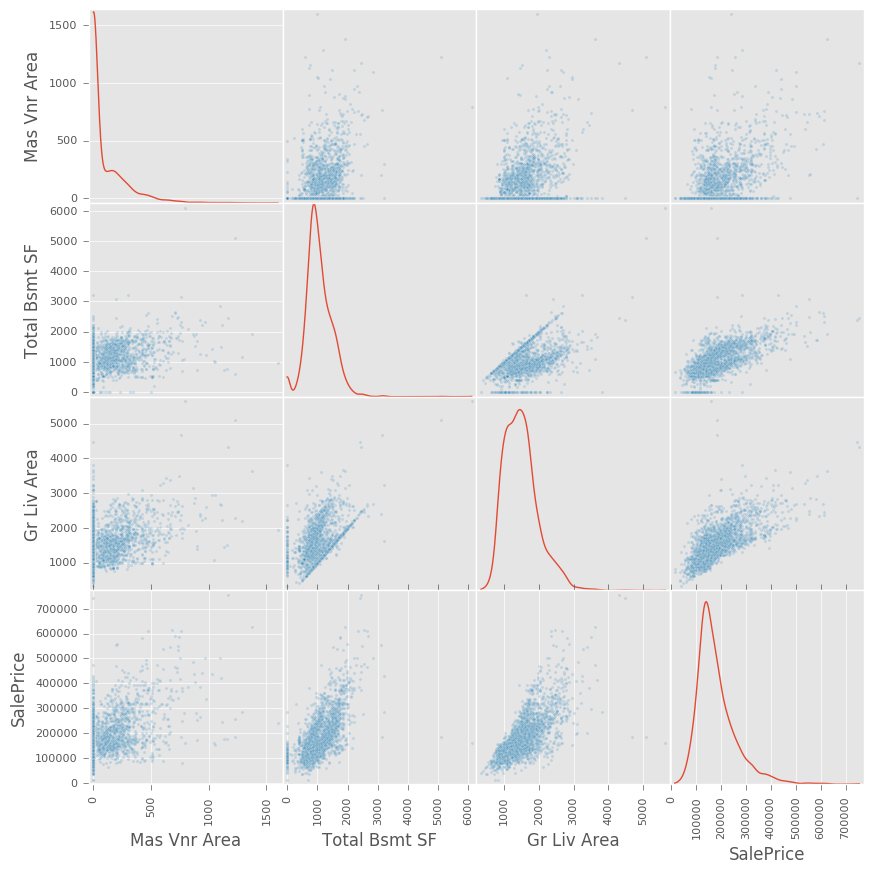

In [9]:
continuous_df = continuous_df[[
       u'Mas Vnr Area',
       u'Total Bsmt SF', 
       u'Gr Liv Area', 
       u'SalePrice']]
print continuous_df.corr()
scatter_matrix(continuous_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [10]:
df = df.loc[:, ['Lot Shape',
                'Bldg Type', 
                'Foundation',
                'TotRms AbvGrd',
                'Mas Vnr Area',
                'Total Bsmt SF',
                'Gr Liv Area',
                'Overall Qual',
                'Neighborhood',
                'SalePrice'
               ]]
df['Overall Qual'] = df['Overall Qual'].apply(str)

lot_dummies = pd.get_dummies(df['Lot Shape'], prefix = 'lot_shape')
bldg_dummies = pd.get_dummies(df['Bldg Type'], prefix = 'bldg_type')
foundation_dummies = pd.get_dummies(df['Foundation'], prefix = 'foundation')
rooms_dummies = pd.get_dummies(df['TotRms AbvGrd'], prefix = 'rooms')
qual_dummies = pd.get_dummies(df['Overall Qual'], prefix= 'qual')
neigh_dummies = pd.get_dummies(df['Neighborhood'], prefix= 'neigh')

df = df.join(lot_dummies).join(bldg_dummies).join(foundation_dummies)\
    .join(rooms_dummies).join(qual_dummies).join(neigh_dummies)\
    .drop(['Lot Shape', 'Bldg Type', 'Foundation', 'TotRms AbvGrd', 'Overall Qual', 'Neighborhood'], axis = 1)
df.dropna(inplace = True)

y = df.SalePrice
X = df.drop('SalePrice', axis = 1)

scaler = MinMaxScaler()
continuous_df = X.loc[:,['Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area']]
continuous_df = pd.DataFrame(scaler.fit_transform(continuous_df), columns=continuous_df.columns)
df = df.drop(['Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area'], axis = 1).join(continuous_df)

print df.shape


(2906, 71)


In [11]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .8, random_state = 0)

model = linear_model.LinearRegression()
model.fit(train_X,train_y)

print model.intercept_
print model.coef_
print model.score(train_X,train_y)
print model.score(test_X,test_y)

27487.5097065
[  1.75440926e+01   2.47452659e+01   5.49271803e+01   5.36505480e+03
   2.03027245e+04  -2.86529997e+04   2.98522047e+03   1.96648908e+04
   1.01003405e+04  -4.77108569e+03  -1.70052762e+04  -7.98886943e+03
  -8.19663549e+03  -3.55740637e+01   6.84312973e+03   5.71228573e+03
  -1.40703078e+03  -2.91617513e+03   7.05153967e+04   5.32345132e+04
   4.70023236e+04   3.94574947e+04   3.58365654e+04   3.37942006e+04
   3.81654593e+04   3.14486325e+04   3.34778328e+04   2.79593474e+04
  -4.95629809e+03   1.62329670e+04  -1.21003026e+04  -4.10068132e+05
  -8.09170237e+04   1.34232490e+05  -5.04853754e+04  -4.66710818e+04
  -3.38349079e+04  -2.35766509e+04  -1.22268230e+04  -2.09004080e+02
   2.45566715e+04   8.91317055e+04   1.16342568e+04   7.02112469e+03
  -1.37061250e+04  -2.44939580e+04   1.69788541e+03  -5.03745623e+03
   1.01061420e+04  -2.70800249e+04  -1.12021168e+04   9.59413645e+03
   1.14988161e+05  -3.79781123e+04  -1.01448517e+03  -8.91878747e+03
  -8.83986746e+03  -

In [12]:
model_reg = linear_model.Lasso(max_iter = 10000, alpha = 3)
model_reg.fit(train_X,train_y)

print model_reg.intercept_
print model_reg.coef_
print model_reg.score(train_X,train_y)
print model_reg.score(test_X,test_y)

42873.2910343
[  1.75759732e+01   2.48197407e+01   5.45139610e+01   2.04634707e+03
   1.69024094e+04  -3.13939792e+04  -3.48391248e+02   2.47137016e+04
   1.47232504e+04   0.00000000e+00  -1.12575134e+04  -2.36613493e+03
  -8.24760563e+03   4.71260340e-02   6.89115339e+03   5.58624223e+03
  -4.75120509e+02  -1.15337681e+03   2.18144417e+04   1.82286695e+04
   1.26549685e+04   5.32126737e+03   1.82057246e+03  -5.26616040e+00
   4.44104181e+03  -2.05103534e+03   0.00000000e+00  -5.01216356e+03
  -3.75516807e+04  -9.76388278e+03  -3.79132655e+04  -4.35444199e+05
  -6.13130335e+04   1.46109073e+05  -3.72009143e+04  -3.41275497e+04
  -2.14807184e+04  -1.13166595e+04   9.51214034e-02   1.20645388e+04
   3.69279683e+04   1.01405553e+05   1.57429306e+04   1.08026213e+04
  -9.02663227e+03  -1.92059161e+04   6.60858598e+03  -0.00000000e+00
   1.49705267e+04  -2.20855690e+04  -6.14910783e+03   1.33878485e+04
   1.16151362e+05  -3.29561146e+04   0.00000000e+00  -4.11253481e+03
  -3.72211671e+03  -

In [13]:
model_ridge = linear_model.Ridge(max_iter = 1000, alpha = 0.1)
model_ridge.fit(train_X,train_y)

print model_ridge.intercept_
print model_ridge.coef_
print model_ridge.score(train_X,train_y)
print model_ridge.score(test_X,test_y)


31583.3855249
[  1.71930226e+01   2.44326394e+01   5.43534310e+01   5.15871266e+03
   2.02014261e+04  -2.81636444e+04   2.80350562e+03   1.96541304e+04
   9.94043958e+03  -4.85540004e+03  -1.69411520e+04  -7.79801790e+03
  -8.18741982e+03   7.27383716e+01   6.90962235e+03   5.45299941e+03
  -1.44921041e+03  -2.79872989e+03   5.50842663e+04   4.99403040e+04
   4.41081890e+04   3.68642294e+04   3.33638801e+04   3.15272653e+04
   3.60461647e+04   2.94633084e+04   3.17945834e+04   2.64268771e+04
  -6.04782366e+03   1.31190378e+04  -1.20034281e+04  -3.69686854e+05
  -7.46558825e+04   1.31954221e+05  -5.05250907e+04  -4.71701132e+04
  -3.43719557e+04  -2.42161874e+04  -1.28057994e+04  -7.62190156e+02
   2.40070408e+04   8.85459574e+04   1.15988096e+04   6.89571203e+03
  -1.37263806e+04  -2.42848773e+04   1.99928619e+03  -4.79306683e+03
   1.03574332e+04  -2.72138208e+04  -1.10942410e+04   9.85352110e+03
   1.09567570e+05  -3.79836663e+04  -8.25536553e+02  -8.96615306e+03
  -8.62335109e+03  -